<a href="https://colab.research.google.com/github/geovalexis/ml-in-args/blob/master/ml/ML_for_AMR_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read data

In [ ]:
args_df = pd.read_csv("/content/drive/MyDrive/TFM/data/args_data_cleaned.tsv", sep="\t", header=0)
args_df

,sample_name,NarA,NarB,aac(3)-IId,aac(3)-VIa,aac(6')-Iaa,aac(6')-aph(2''),aadA1,aadA2,aadE-Cc,...,ere(A),erm(42),fosA3,mph(E),msr(E),qnrA1,qnrB2,qnrB77,qnrS2,tet(D)
0,GCA_012637185.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GCA_012637285.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GCA_012637315.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GCA_012637385.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GCA_012637425.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6203,GCA_008519545.1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6204,GCA_008476005.1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6205,GCF_001480865.1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6206,GCA_007474515.1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
snps_df = pd.read_csv("/content/drive/MyDrive/TFM/data/snps_data_cleaned.tsv", sep="\t", header=0)
snps_df

,sample_name,ECs_1169/123,ECs_1169/456,ECs_1169/462,ECs_1169/511,ECs_1169/66,ECs_1169/381,ECs_1169/312,ECs_1169/321,ECs_1169/324,...,STM2704/1046,STM2704/1069,STM2704/216,STM2704/219,STM2704/305,STM2704/281,STM2704/311,STM2704/314,STM2704/329,STM2704/351
0,GCA_012688215.1,3,1,1,2,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,GCA_012677385.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,GCA_005287105.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,GCA_012687565.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,GCA_005284005.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,GCF_001262435.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
110,GCA_008429375.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
111,GCA_007752895.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
112,GCA_008423645.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
amr_labels_df = pd.read_csv("/content/drive/MyDrive/TFM/data/amr_labels_cleaned.tsv", sep="\t", header=0)
amr_labels_df

,SampleID,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0,GCA_007192475.1,1.0,1.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,GCA_007191145.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,GCA_007188155.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,GCA_007190575.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0
4,GCA_007194615.1,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,GCA_006500015.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
6203,GCA_006497875.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,1.0
6204,GCA_006497955.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
6205,GCA_006815005.1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.0,0.0,1.0,1.0,1.0,0.0


# Preprocess data

For some reason, the sample `GCF_001242765.1` does not have AMR label information:

In [ ]:
args_df = args_df[args_df["sample_name"] != "GCF_001242765.1"]

In [ ]:
snps_df = snps_df[snps_df["sample_name"] != "GCF_001242765.1"]

Let's how much imbalance do we have:



In [ ]:
amr_labels_df.drop("SampleID", axis=1).apply(pd.value_counts)

,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0.0,4689,3790,4773,4087,4683,5238,6022,5576,5931,3623,3557,2863,5365
1.0,753,1652,669,707,759,204,185,630,275,1818,1539,3343,76


# Apply ML methods

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# This cell is meant to be run optionally between each approach.
# This code will check whether we have a very imbalance dataset or maybe some intrusion within the input data:
# Use the following snippet to check that out. It should give a low accuracy.

# from sklearn.dummy import DummyClassifier
# accuracy_score(y_test, DummyClassifier().fit(X_train, y_train).predict(X_test))

0.3333333333333333

## Approach 1: both ARGs and SNPs

In [ ]:
y = pd.merge(args_df["sample_name"], amr_labels_df, left_on="sample_name", right_on="SampleID")
y = y.drop("SampleID", axis=1).set_index("sample_name")
y = y.dropna()
y.apply(pd.value_counts)

,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0.0,3770,2973,3840,3781,3769,4292,4441,3887,4381,2856,3016,1979,4396
1.0,678,1475,608,667,679,156,7,561,67,1592,1432,2469,52


In [ ]:
X = pd.merge(args_df, snps_df, how="left", on="sample_name")
X = pd.merge(y.reset_index()[["sample_name"]], X, how="left", on="sample_name")
X = X.fillna(-1).set_index("sample_name") #TODO: instead of setting -1, set only -1 if gene does not belong to the sample/specie, otherwise 0.
X

,NarA,NarB,aac(3)-IId,aac(3)-VIa,aac(6')-Iaa,aac(6')-aph(2''),aadA1,aadA2,aadE-Cc,ant(2'')-Ia,...,STM2704/1046,STM2704/1069,STM2704/216,STM2704/219,STM2704/305,STM2704/281,STM2704/311,STM2704/314,STM2704/329,STM2704/351
sample_name,,,,,,,,,,,,,,,,,,,,,
GCA_003869435.1,0,0,0,0,1,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
GCA_003870275.1,0,0,0,0,1,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
GCA_003870555.1,0,0,0,0,1,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
GCA_003872315.1,0,0,0,0,1,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
GCA_003872455.1,0,0,0,0,1,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_001242565.1,0,0,0,0,1,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
GCA_007189195.1,0,0,0,0,1,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
GCA_008426085.1,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.849438202247191


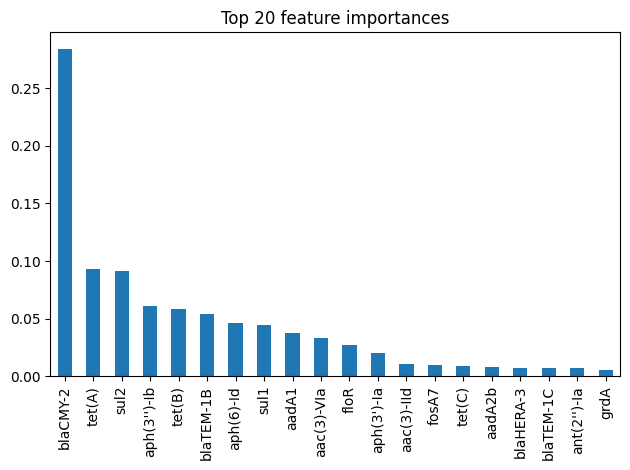

In [ ]:
# Plot top 20 features importances
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Top 20 feature importances")
fig.tight_layout()

## Approach 2: only ARGs data

In [ ]:
y = pd.merge(args_df["sample_name"], amr_labels_df, left_on="sample_name", right_on="SampleID")
y = y.drop("SampleID", axis=1).set_index("sample_name")
y = y.dropna()
y.apply(pd.value_counts)

,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0.0,3770,2973,3840,3781,3769,4292,4441,3887,4381,2856,3016,1979,4396
1.0,678,1475,608,667,679,156,7,561,67,1592,1432,2469,52


In [ ]:
X = pd.merge(y.reset_index()[["sample_name"]], args_df, how="left", on="sample_name")
X = X.fillna(-1).set_index("sample_name")
X

,NarA,NarB,aac(3)-IId,aac(3)-VIa,aac(6')-Iaa,aac(6')-aph(2''),aadA1,aadA2,aadE-Cc,ant(2'')-Ia,...,ere(A),erm(42),fosA3,mph(E),msr(E),qnrA1,qnrB2,qnrB77,qnrS2,tet(D)
sample_name,,,,,,,,,,,,,,,,,,,,,
GCA_003869435.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_003870275.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_003870555.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_003872315.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_003872455.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_001242565.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_007189195.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_008426085.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8651685393258427


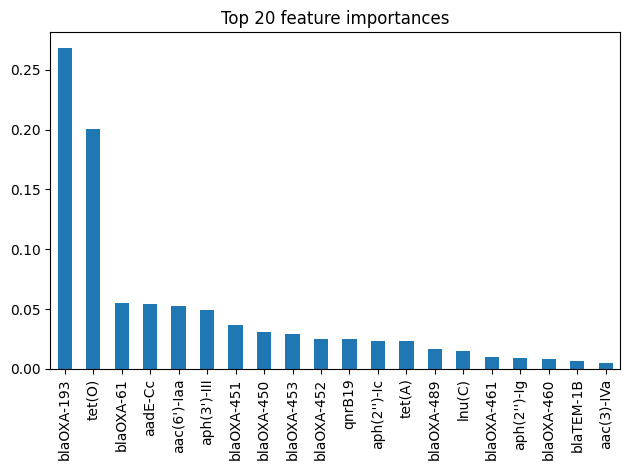

In [ ]:
# Plot top 20 features importances
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Top 20 feature importances")
fig.tight_layout()

## Approach 3: only SNPs data

In [ ]:
y = pd.merge(snps_df["sample_name"], amr_labels_df, left_on="sample_name", right_on="SampleID")
y = y.drop("SampleID", axis=1).set_index("sample_name")
y = y.dropna()
y.apply(pd.value_counts)

,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0.0,43.0,31,43.0,43.0,43.0,40,43.0,40,42,27,32,16,42
1.0,NaN,12,NaN,NaN,NaN,3,NaN,3,1,16,11,27,1


In [ ]:
X = pd.merge(y.reset_index()[["sample_name"]], snps_df, how="left", on="sample_name")
X = X.fillna(-1).set_index("sample_name")
X

,ECs_1169/123,ECs_1169/456,ECs_1169/462,ECs_1169/511,ECs_1169/66,ECs_1169/381,ECs_1169/312,ECs_1169/321,ECs_1169/324,ECs_1169/411,...,STM2704/1046,STM2704/1069,STM2704/216,STM2704/219,STM2704/305,STM2704/281,STM2704/311,STM2704/314,STM2704/329,STM2704/351
sample_name,,,,,,,,,,,,,,,,,,,,,
GCA_004227885.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
GCA_006498475.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
GCA_006498335.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
GCA_006498495.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
GCA_006497275.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
GCA_006496815.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
GCA_006814205.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
GCA_006811555.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
GCA_006757425.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5555555555555556


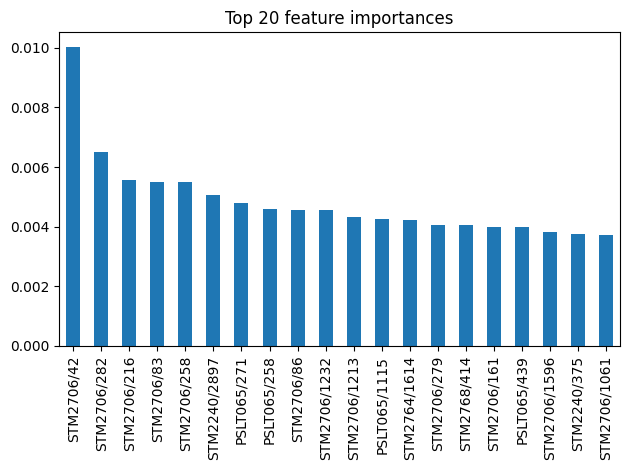

In [ ]:
# Plot top 20 features importances
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Top 20 feature importances")
fig.tight_layout()